In [1]:
from lib.skin_disease.data_module import DataModule
from lib.skin_disease.model_factory import get_model_and_preprocess
from lib.skin_disease.trainer import Trainer


def train(model_name, epochs=10):
    model, preprocess = get_model_and_preprocess(model_name)

    dm = DataModule(
        data_dir='../../dataset/skin_diseases/train',
        img_size=preprocess.resize_size[0],
        mean=preprocess.mean,
        std=preprocess.std,
    )
    dm.setup()

    train_files = {
        dm.train_ds.subset.dataset.samples[i][0] for i in dm.train_ds.subset.indices
    }
    val_files = {
        dm.val_ds.subset.dataset.samples[i][0] for i in dm.val_ds.subset.indices
    }

    overlap = train_files.intersection(val_files)
    print(f'중복된 파일 개수: {len(overlap)}')  # 0이 나와야 정상입니다.
    overlap = train_files.intersection(val_files)
    print(f'중복된 파일 개수: {len(overlap)}')  # 0이 나와야 정상입니다.
    train_loader, val_loader = dm.get_loaders()

    trainer = Trainer(model, train_loader, val_loader, model_name, lr=1e-4)
    trainer.run(epochs=epochs)

    return model, dm, trainer

In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

from lib.skin_disease.test_model import test_model


def report(model, dm, trainer):
    test_transform = transforms.Compose(
        [
            transforms.Resize((dm.img_size, dm.img_size)),
            transforms.ToTensor(),
            transforms.Normalize(dm.mean, dm.std),
        ]
    )

    test_dataset = datasets.ImageFolder(
        root='../../dataset/skin_diseases/test', transform=test_transform
    )
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

    test_model(model, test_loader, test_dataset.classes, trainer.device)

✅ Data Loaded: Train(1196), Val(298)
중복된 파일 개수: 0
중복된 파일 개수: 0


Epoch 0: 100%|██████████| 38/38 [00:15<00:00,  2.45it/s, loss=0.5814]


✨ Epoch 0: Val Acc 83.22% | Best 83.22%


Epoch 1: 100%|██████████| 38/38 [00:15<00:00,  2.45it/s, loss=0.2809]


✨ Epoch 1: Val Acc 93.96% | Best 93.96%


Epoch 2: 100%|██████████| 38/38 [00:15<00:00,  2.47it/s, loss=1.0062]


✨ Epoch 2: Val Acc 94.30% | Best 94.30%


Epoch 3: 100%|██████████| 38/38 [00:15<00:00,  2.40it/s, loss=0.0292]


✨ Epoch 3: Val Acc 96.64% | Best 96.64%


Epoch 4: 100%|██████████| 38/38 [00:15<00:00,  2.47it/s, loss=0.2357]


✨ Epoch 4: Val Acc 96.31% | Best 96.64%


Epoch 5: 100%|██████████| 38/38 [00:15<00:00,  2.47it/s, loss=0.0208]


✨ Epoch 5: Val Acc 97.32% | Best 97.32%


Epoch 6: 100%|██████████| 38/38 [00:15<00:00,  2.46it/s, loss=0.1851]


✨ Epoch 6: Val Acc 97.99% | Best 97.99%


Epoch 7: 100%|██████████| 38/38 [00:15<00:00,  2.45it/s, loss=1.1764]


✨ Epoch 7: Val Acc 97.65% | Best 97.99%


Epoch 8: 100%|██████████| 38/38 [00:15<00:00,  2.46it/s, loss=0.4269]


✨ Epoch 8: Val Acc 93.62% | Best 97.99%


Epoch 9: 100%|██████████| 38/38 [00:15<00:00,  2.46it/s, loss=0.0429]


✨ Epoch 9: Val Acc 97.65% | Best 97.99%

📊 상세 성능 리포트:
              precision    recall  f1-score   support

        acne       0.29      0.20      0.24        10
       eksim       0.31      0.40      0.35        10
      herpes       0.53      0.90      0.67        10
        panu       0.88      0.70      0.78        10
     rosacea       0.40      0.20      0.27        10

    accuracy                           0.48        50
   macro avg       0.48      0.48      0.46        50
weighted avg       0.48      0.48      0.46        50



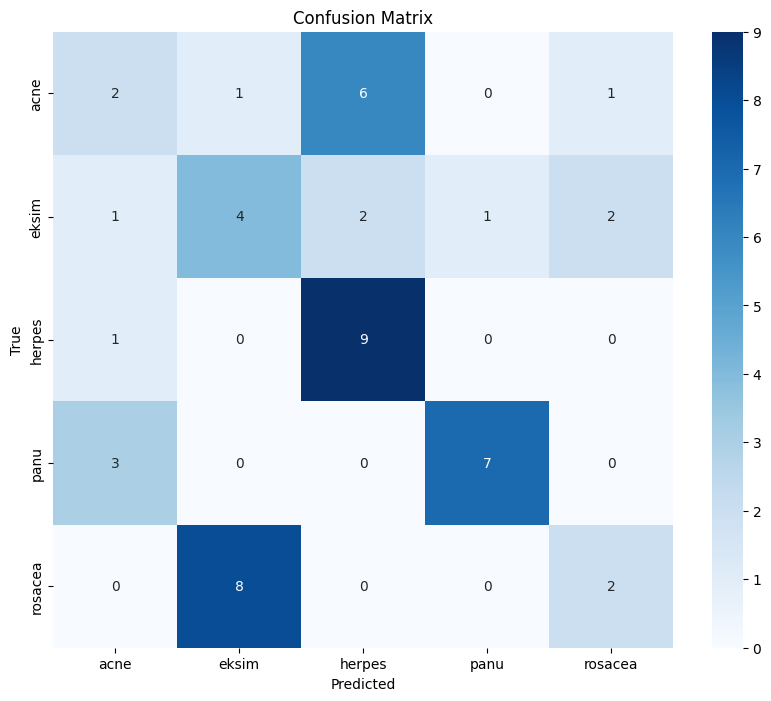

In [6]:
model, dm, trainer = train('resnet34')
report(model, dm, trainer)

✅ Data Loaded: Train(1196), Val(298)
중복된 파일 개수: 0
중복된 파일 개수: 0


Epoch 0: 100%|██████████| 38/38 [00:17<00:00,  2.19it/s, loss=1.6368]


✨ Epoch 0: Val Acc 34.90% | Best 34.90%


Epoch 1: 100%|██████████| 38/38 [00:17<00:00,  2.19it/s, loss=1.3612]


✨ Epoch 1: Val Acc 43.96% | Best 43.96%


Epoch 2: 100%|██████████| 38/38 [00:17<00:00,  2.21it/s, loss=1.2303]


✨ Epoch 2: Val Acc 51.68% | Best 51.68%


Epoch 3: 100%|██████████| 38/38 [00:17<00:00,  2.20it/s, loss=1.2474]


✨ Epoch 3: Val Acc 56.38% | Best 56.38%


Epoch 4: 100%|██████████| 38/38 [00:17<00:00,  2.20it/s, loss=1.1316]


✨ Epoch 4: Val Acc 61.41% | Best 61.41%


Epoch 5: 100%|██████████| 38/38 [00:17<00:00,  2.21it/s, loss=1.2363]


✨ Epoch 5: Val Acc 63.09% | Best 63.09%


Epoch 6: 100%|██████████| 38/38 [00:17<00:00,  2.20it/s, loss=1.2260]


✨ Epoch 6: Val Acc 66.44% | Best 66.44%


Epoch 7: 100%|██████████| 38/38 [00:17<00:00,  2.20it/s, loss=0.9059]


✨ Epoch 7: Val Acc 66.11% | Best 66.44%


Epoch 8: 100%|██████████| 38/38 [00:17<00:00,  2.20it/s, loss=1.0759]


✨ Epoch 8: Val Acc 66.11% | Best 66.44%


Epoch 9: 100%|██████████| 38/38 [00:17<00:00,  2.18it/s, loss=1.1464]


✨ Epoch 9: Val Acc 67.45% | Best 67.45%

📊 상세 성능 리포트:
              precision    recall  f1-score   support

        acne       0.21      0.30      0.25        10
       eksim       0.07      0.10      0.08        10
      herpes       0.62      0.80      0.70        10
        panu       0.67      0.40      0.50        10
     rosacea       0.00      0.00      0.00        10

    accuracy                           0.32        50
   macro avg       0.31      0.32      0.31        50
weighted avg       0.31      0.32      0.31        50



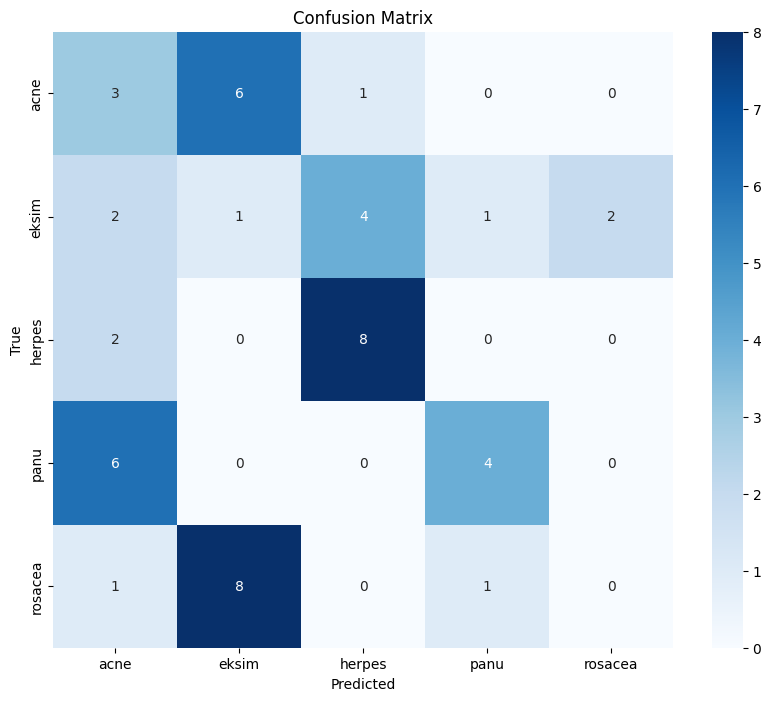

In [7]:
model, dm, trainer = train('convnext_tiny')
report(model, dm, trainer)

In [ ]:
model, dm, trainer = train('efficientnet_v2_s')
report(model, dm, trainer)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt


def visualize_results(model, test_loader, classes, device, n=5):
    model.eval()
    plt.figure(figsize=(15, 5))

    # 로더에서 한 배포 가져오기
    imgs, labels = next(iter(test_loader))
    imgs, labels = imgs.to(device), labels.to(device)
    outputs = model(imgs)
    preds = outputs.argmax(dim=1)

    for i in range(n):
        img = imgs[i].cpu().numpy().transpose((1, 2, 0))
        # 정규화 되돌리기 (시각화용)
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        img = std * img + mean
        img = np.clip(img, 0, 1)

        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        plt.title(f'True: {classes[labels[i]]}\nPred: {classes[preds[i]]}')
        plt.axis('off')
    plt.show()


test_loader = []

visualize_results(model, test_loader, dm.classes, trainer.device)